# Working with Classified data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import plotly.express as px

In [3]:
sns.set_theme(color_codes=True)
sns.set_style('whitegrid')
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

In [4]:
df = pd.read_csv('Classified Data',index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [5]:
X = df.drop('TARGET CLASS',axis=1)

In [6]:
y = df['TARGET CLASS']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
scaler.fit(X_train)

StandardScaler()

In [12]:
X_train = scaler.transform(X_train)

In [13]:
X_test = scaler.transform(X_test)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

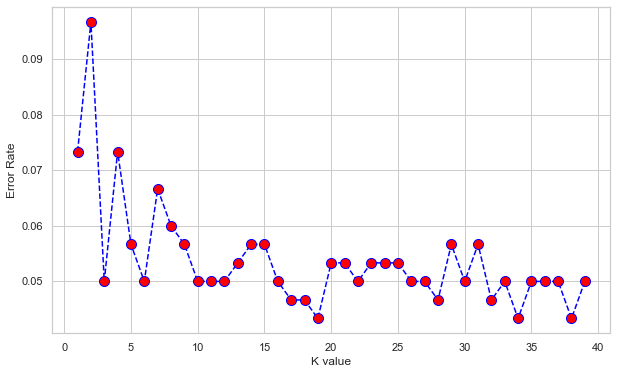

In [16]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',ls="dashed",marker='o',markerfacecolor='red'
        ,markersize=10)
plt.xlabel('K value')
plt.ylabel('Error Rate')

In [17]:
KNN = KNeighborsClassifier(n_neighbors=34)
KNN.fit(X_train,y_train)
pred = knn.predict(X_test)

In [18]:
from sklearn.metrics import classification_report,confusion_matrix

In [19]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       159
           1       0.94      0.95      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [20]:
from sklearn.model_selection import KFold
knn = KNeighborsClassifier(n_neighbors=34)
kfold_validation=KFold(10)

In [21]:
from sklearn.model_selection import cross_val_score
results=cross_val_score(knn,X,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.92 0.95 0.92 0.92 0.92 0.94 0.95 0.94 0.96 0.97]
0.9390000000000001
